In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
merge_df = pd.read_csv("results/corr_all/384/boosting|ridge-top96/actcut-1/merge_all.csv")
merge_df

# _filter_active = 1
# _active_lib_list = merge_df[merge_df["percent_active"]>_filter_active]["lib"].tolist()

# merge_df = merge_df[merge_df["lib"].isin(_active_lib_list)]
# merge_df


,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,deltafrac_double_mlde,deltafrac_single_mlde,deltafrac_ft_mlde,deltafrac_ft_recomb_SSM,deltafrac_ft_single_step_DE,deltafrac_ft_top96_SSM,deltafrac_ft-comb_mlde,deltafrac_ft-comb_recomb_SSM,deltafrac_ft-comb_single_step_DE,deltafrac_ft-comb_top96_SSM
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.320,0.395,0.361667,0.736503,0.543099,0.194348,0.361667,0.736503,0.543099,0.194348
1,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,-0.015,-0.485,0.011667,0.711499,0.436128,0.274028,0.013333,0.713166,0.437795,0.275694
2,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,-0.135,0.265,0.320000,0.447136,0.172117,0.276468,0.320000,0.447136,0.172117,0.276468
3,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.015,-0.030,0.171667,0.214611,0.190622,0.191627,0.171667,0.214611,0.190622,0.191627
4,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.285,0.485,0.285000,0.727976,0.615088,0.391398,0.285000,0.727976,0.615088,0.391398
5,TrpB3E,3.0,7964.0,99.550000,161.0,2.021597,0.041910,0.610622,5.0,0.002082,...,0.555,0.465,0.555000,0.832298,0.795031,0.770186,0.555000,0.832298,0.795031,0.770186
6,TrpB3F,3.0,7737.0,96.712500,82.0,1.059842,0.092374,1.000000,1.0,-0.023140,...,0.115,-0.080,0.116667,0.582033,0.449919,0.252764,0.120000,0.585366,0.453252,0.256098
7,TrpB3G,3.0,7891.0,98.637500,108.0,1.368648,0.072712,0.519956,13.0,-0.002391,...,0.190,-0.715,0.236667,0.747963,0.609074,0.451667,0.236667,0.747963,0.609074,0.451667
8,TrpB3I,3.0,7784.0,97.300000,2494.0,32.040082,0.062782,0.525375,114.0,0.072851,...,0.225,0.205,0.238333,0.888662,0.718587,0.286417,0.238333,0.888662,0.718587,0.286417
9,TrpB4,4.0,159129.0,99.455625,9783.0,6.147842,0.054049,0.408074,1093.0,0.021149,...,0.005,-0.045,0.185000,0.211090,0.160432,0.091801,0.185000,0.211090,0.160432,0.091801


In [5]:
corr_df = pd.read_csv('results/corr_all/384/boosting|ridge-top96/actcut-1/corr.csv')
corr_df

,descriptor,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,parent_rank_percent,...,delta_ft_top96_SSM,delta_ft-comb_recomb_SSM,delta_ft-comb_single_step_DE,delta_ft-comb_top96_SSM,deltafrac_ft_recomb_SSM,deltafrac_ft_single_step_DE,deltafrac_ft_top96_SSM,deltafrac_ft-comb_recomb_SSM,deltafrac_ft-comb_single_step_DE,deltafrac_ft-comb_top96_SSM
0,n_site,1.000000,0.698430,-0.174608,0.696311,0.000000,-0.261116,-0.609272,0.696311,0.435194,...,0.174078,0.261116,0.087039,0.174078,-0.696311,-0.609272,-0.696311,-0.696311,-0.609272,-0.696311
1,numb_measured,0.698430,1.000000,0.500000,0.547115,0.024316,-0.231004,-0.802435,0.699091,0.577510,...,0.145897,0.182372,0.048632,0.145897,-0.310032,-0.370822,-0.437692,-0.310032,-0.370822,-0.437692
2,percent_measured,-0.174608,0.500000,1.000000,-0.109423,-0.109423,0.097265,-0.255320,0.066870,0.151976,...,-0.012158,-0.158055,-0.072949,-0.012158,0.297874,0.127660,0.133739,0.297874,0.127660,0.133739
3,numb_active,0.696311,0.547115,-0.109423,1.000000,0.709091,-0.624242,-0.406061,0.660606,0.515152,...,-0.503030,-0.357576,-0.563636,-0.503030,-0.587879,-0.660606,-0.600000,-0.587879,-0.660606,-0.600000
4,percent_active,0.000000,0.024316,-0.109423,0.709091,1.000000,-0.600000,0.018182,0.260606,0.321212,...,-0.854545,-0.709091,-0.842424,-0.854545,-0.127273,-0.296970,-0.163636,-0.127273,-0.296970,-0.163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,single_msa-comb_ndcg,-0.609272,-0.340427,0.279637,-0.018182,0.515152,-0.369697,0.612121,-0.539394,-0.393939,...,-0.551515,-0.600000,-0.539394,-0.551515,0.260606,0.115152,0.296970,0.260606,0.115152,0.296970
119,single_msa-comb_rocauc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,single_structnmsa-comb_rho,0.261116,-0.164134,-0.699091,0.127273,0.030303,-0.296970,-0.006061,0.200000,0.078788,...,0.151515,0.224242,0.163636,0.151515,-0.212121,-0.187879,-0.127273,-0.212121,-0.187879,-0.127273
121,single_structnmsa-comb_ndcg,-0.348155,-0.644380,-0.328269,0.066667,0.430303,-0.224242,0.745455,-0.381818,-0.369697,...,-0.648485,-0.733333,-0.636364,-0.648485,-0.224242,-0.345455,-0.054545,-0.224242,-0.345455,-0.054545


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
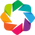

Loading BokehJS ...

Loading BokehJS ...

In [6]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from matplotlib.colors import LinearSegmentedColormap, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# for html to png
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options

from SSMuLA.de_simulations import DE_TYPES, DE_LEGEND_MAP
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS
from SSMuLA.vis_summary import ZS_METRICS
from SSMuLA.get_corr import LANDSCAPE_ATTRIBUTES, val_list, zs_list
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, LIB_COLORS, save_plt
from SSMuLA.util import checkNgen_folder

%matplotlib inline

In [7]:
# Custom colormap for the MSE row, using greens
cmap_mse = LinearSegmentedColormap.from_list(
    "mse_cmap_r", ["#FFFFFF", "#9bbb59"][::-1], N=100
)  # dark to light green

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "bwg",
    [
        PRESENTATION_PALETTE_SATURATE["blue"],
        "white",
        PRESENTATION_PALETTE_SATURATE["green"],
    ],
    N=100,
)


In [8]:
# corr_df[["descriptor"] + [c for c in corr_df.columns if "delta" in c]].iloc[
#     :33
# ].set_index("descriptor").style.format("{:.2f}").background_gradient(cmap=custom_cmap, vmin=-1, vmax=1)

In [9]:
select_df = (
    corr_df[
        ["descriptor"]
        + [
            "mlde_recomb_SSM_delta",
            "mlde_single_step_DE_delta",
            "mlde_top96_SSM_delta",
        ]
    ]
    .iloc[:33]
    .set_index("descriptor")
)
select_df["Average"] = select_df.mean(axis=1)
select_df["Std"] = select_df.std(axis=1)
select_df.sort_values("Average", ascending=False, key=abs).style.format(
    "{:.2f}"
).background_gradient(cmap=custom_cmap, vmin=-1, vmax=1)

,mlde_recomb_SSM_delta,mlde_single_step_DE_delta,mlde_top96_SSM_delta,Average,Std
descriptor,,,,,
mean,-0.92,-0.87,-0.89,-0.89,0.02
variance,-0.92,-0.79,-0.85,-0.85,0.05
std_dev,-0.92,-0.79,-0.85,-0.85,0.05
fraction_non-magnitude,0.76,0.96,0.84,0.85,0.08
fraction_reciprocal-sign,0.73,0.92,0.90,0.85,0.08
Q2,-0.89,-0.78,-0.87,-0.85,0.05
loc,-0.89,-0.78,-0.87,-0.85,0.05
median,-0.89,-0.78,-0.87,-0.85,0.05
kurt,0.89,0.77,0.84,0.83,0.05


In [10]:
select_df3 = (
    corr_df[
        ["descriptor"]
        + [
            'delta_ft_recomb_SSM', 'delta_ft_single_step_DE', 'delta_ft_top96_SSM',
        ]
    ]
    .iloc[:33]
    .set_index("descriptor")
)
select_df3["Average"] = select_df3.mean(axis=1)
select_df3["Std"] = select_df3.std(axis=1)
select_df3.sort_values("Average", ascending=False, key=abs).style.format(
    "{:.2f}"
).background_gradient(cmap=custom_cmap, vmin=-1, vmax=1)

,delta_ft_recomb_SSM,delta_ft_single_step_DE,delta_ft_top96_SSM,Average,Std
descriptor,,,,,
std_dev,-0.95,-0.92,-0.96,-0.94,0.02
variance,-0.95,-0.92,-0.96,-0.94,0.02
kurt,0.94,0.89,0.95,0.93,0.03
mean,-0.89,-0.94,-0.94,-0.92,0.02
median,-0.87,-0.88,-0.89,-0.88,0.01
Q2,-0.87,-0.88,-0.89,-0.88,0.01
loc,-0.87,-0.88,-0.89,-0.88,0.01
Q3,-0.88,-0.83,-0.89,-0.87,0.03
fraction_non-magnitude,0.73,0.92,0.85,0.83,0.08


In [11]:
select_df2 = (
    corr_df[
        ["descriptor"]
        + [
            "mlde_recomb_SSM_deltafrac",
            "mlde_single_step_DE_deltafrac",
            "mlde_top96_SSM_deltafrac",
        ]
    ]
    .iloc[:33]
    .set_index("descriptor")
)
select_df2["Average"] = select_df2.mean(axis=1)
select_df2["Std"] = select_df2.std(axis=1)
select_df2.sort_values("Average", ascending=False, key=abs).style.format(
    "{:.2f}"
).background_gradient(cmap=custom_cmap, vmin=-1, vmax=1)

,mlde_recomb_SSM_deltafrac,mlde_single_step_DE_deltafrac,mlde_top96_SSM_deltafrac,Average,Std
descriptor,,,,,
range,0.47,0.54,0.65,0.55,0.07
n_site,-0.70,-0.52,-0.44,-0.55,0.11
numb_measured,-0.66,-0.57,-0.43,-0.55,0.10
numb_active,-0.50,-0.50,-0.50,-0.50,0.00
numb_loc_opt_norm_cannot_escape,-0.68,-0.61,-0.19,-0.49,0.22
frac_loc_opt_norm_cannot_escape,0.43,0.42,0.53,0.46,0.05
parent_fit,0.39,0.24,0.48,0.37,0.10
iqr,0.50,0.32,0.27,0.37,0.10
scale,0.50,0.32,0.27,0.37,0.10


In [12]:
LIB_COLORS

{'DHFR': '#f79646ff',
 'ParD2': '#ffbb78',
 'ParD3': '#6e4a2eff',
 'GB1': '#f9be00',
 'TrpB3A': '#89bf91',
 'TrpB3B': '#6db290',
 'TrpB3C': '#57a490',
 'TrpB3D': '#44948f',
 'TrpB3E': '#33858d',
 'TrpB3F': '#24768b',
 'TrpB3G': '#1c6689',
 'TrpB3H': '#215584',
 'TrpB3I': '#28437b',
 'TrpB4': '#666666'}

In [13]:
merge_df = merge_df.set_index("lib")

In [14]:
de_mean = merge_df[[c for c in merge_df.columns if "mean_all" in c]].mean(axis=1)
de_std = merge_df[[c for c in merge_df.columns if "mean_all" in c]].std(axis=1)

In [15]:
[c for c in merge_df.columns if "mean_all" in c]

['single_step_DE_mean_all', 'recomb_SSM_mean_all', 'top96_SSM_mean_all']

In [16]:
merge_df["top_maxes"] - de_mean

lib
DHFR      0.047944
ParD2     0.034669
ParD3     0.010574
GB1       0.173236
TrpB3D    0.192246
TrpB3E    0.296734
TrpB3F    0.256194
TrpB3G    0.258044
TrpB3I    0.161628
TrpB4     0.157650
dtype: float64

In [17]:
merge_df["if_truemaxs"]

lib
DHFR      0.465
ParD2     0.985
ParD3     0.135
GB1       0.045
TrpB3D    0.500
TrpB3E    0.445
TrpB3F    0.880
TrpB3G    0.715
TrpB3I    0.680
TrpB4     0.045
Name: if_truemaxs, dtype: float64

In [18]:
de_mean2 = merge_df[[c for c in merge_df.columns if "fraction_max" in c]].mean(axis=1)
de_std2 = merge_df[[c for c in merge_df.columns if "fraction_max" in c]].std(axis=1)

In [19]:
ACTLIB_COLORS = {
    n: c
    for (n, c) in zip(
        merge_df.index,
        [
            PRESENTATION_PALETTE_SATURATE["brown"],
            PRESENTATION_PALETTE_SATURATE["orange"],
            PRESENTATION_PALETTE_SATURATE["light_orange"],
            PRESENTATION_PALETTE_SATURATE["yellow"],
        ]
        + sns.color_palette("crest", 10).as_hex()[::2]
        + [PRESENTATION_PALETTE_SATURATE["gray"]],
    )
}

In [20]:
ACTLIB_COLORS

{'DHFR': '#6e4a2eff',
 'ParD2': '#f79646ff',
 'ParD3': '#ffbb78',
 'GB1': '#f9be00',
 'TrpB3D': '#8bc191',
 'TrpB3E': '#5ca890',
 'TrpB3F': '#3b8c8e',
 'TrpB3G': '#20718b',
 'TrpB3I': '#225282',
 'TrpB4': '#666666'}

In [21]:
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

In [22]:
de_mean2

lib
DHFR      0.335350
ParD2     0.522782
ParD3     0.156426
GB1       0.017713
TrpB3D    0.206846
TrpB3E    0.200828
TrpB3F    0.568428
TrpB3G    0.348765
TrpB3I    0.287111
TrpB4     0.075559
dtype: float64

In [23]:
merge_df["range"]

lib
DHFR      0.884834
ParD2     1.219261
ParD3     1.205735
GB1       1.000000
TrpB3D    1.439951
TrpB3E    1.317157
TrpB3F    1.466394
TrpB3G    1.275128
TrpB3I    1.308584
TrpB4     1.164071
Name: range, dtype: float64

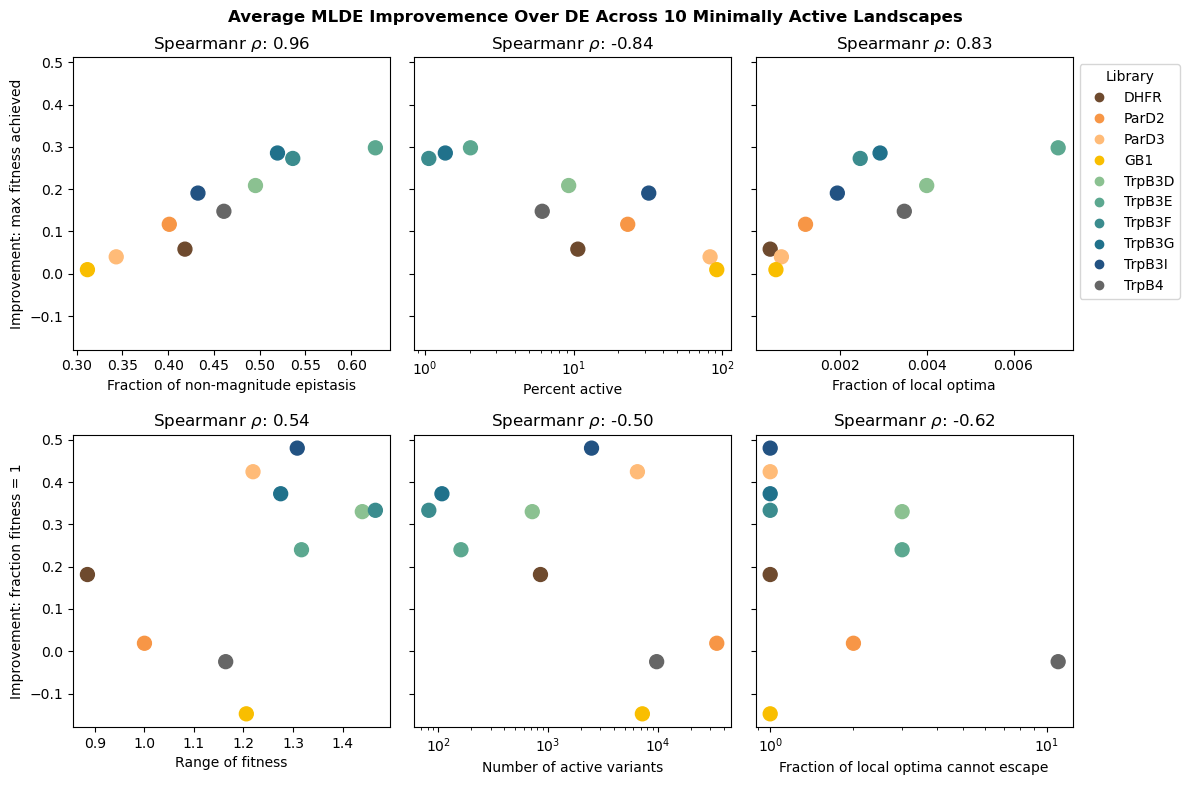

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

merge_df = merge_df.sort_values("lib")

y = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]
y2 = merge_df["if_truemaxs"] -  merge_df["single_step_DE_fraction_max"]
c = list(ACTLIB_COLORS.values())
# factors = {"fraction_non-magnitude": , "percent_active": "Percent active", "frac_loc_opt_total": "Fraction of local optima"}

# Scatter plot on the first axes
# ax[0].errorbar(merge_df["fraction_non-magnitude"], y, yerr=de_std, fmt='o', c="gray", markersize=2)
ax[0, 0].scatter(
    merge_df["fraction_non-magnitude"],
    y,
    c=c,
    s=100,
)
ax[0, 0].set_xlabel("Fraction of non-magnitude epistasis")
ax[0, 0].set_ylabel("Improvement: max fitness achieved")
ax[0, 0].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["fraction_non-magnitude"])[0]))

# Scatter plot on the second axes
ax[0, 1].scatter(
    merge_df["percent_active"], y, c=c, s=100
)
ax[0, 1].set_xscale("log")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[0, 1].set_xlabel("Percent active")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
ax[0, 1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))

# Scatter plot on the third axes
ax[0, 2].scatter(
    merge_df["frac_loc_opt_total"],
    y,
    c=c,
    s=100,
)
ax[0, 2].set_xlabel("Fraction of local optima")
ax[0, 2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))

legend_list = []  # To store legend handles
for l, lc in ACTLIB_COLORS.items():
    legend_list.append(
        Line2D(
            [0],
            [0],
            marker="o",
            linestyle="none",
            color=lc,
            label=l,
        )
    )
ax[0, 2].legend(handles=legend_list, loc="upper left", bbox_to_anchor=(1, 1), title="Library")
# ax[2].set_xlabel('MLDE and DE max fitness achieved')

ax[1, 0].scatter(
    merge_df["range"],
    y2,
    c=c,
    s=100,
)
ax[1, 0].set_xlabel("Range of fitness")
ax[1, 0].set_ylabel("Improvement: fraction fitness = 1")
ax[1, 0].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y2, merge_df["range"])[0]))

ax[1, 1].scatter(
    merge_df["numb_active"],
    y2,
    c=c,
    s=100,
)
ax[1, 1].set_xscale("log")
ax[1, 1].set_xlabel("Number of active variants")
ax[1, 1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y2, merge_df["numb_active"])[0]))

ax[1, 2].scatter(
    merge_df["numb_loc_opt_norm_cannot_escape"],
    y2,
    c=c,
    s=100,
)
ax[1, 2].set_xscale("log")
ax[1, 2].set_xlabel("Fraction of local optima cannot escape")
ax[1, 2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y2, merge_df["numb_loc_opt_norm_cannot_escape"])[0]))

fig.suptitle(
    "Average MLDE Improvemence Over DE Across 10 Minimally Active Landscapes",
    fontsize=12,
    fontweight="bold",
    y=0.975,
)
# Show plot
plt.tight_layout()
plt.show()

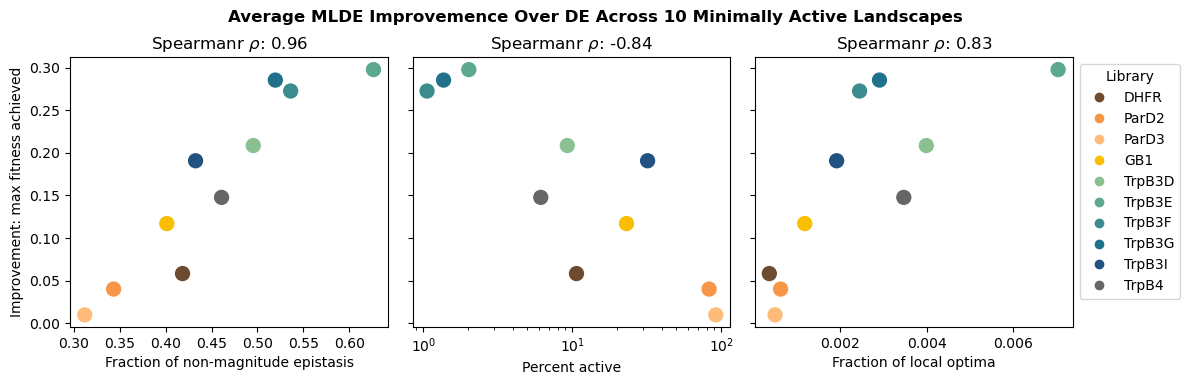

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

y = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]
c = list(ACTLIB_COLORS.values())
# factors = {"fraction_non-magnitude": , "percent_active": "Percent active", "frac_loc_opt_total": "Fraction of local optima"}

# Scatter plot on the first axes
# ax[0].errorbar(merge_df["fraction_non-magnitude"], y, yerr=de_std, fmt='o', c="gray", markersize=2)
ax[0].scatter(
    merge_df["fraction_non-magnitude"],
    y,
    c=c,
    s=100,
)
ax[0].set_xlabel("Fraction of non-magnitude epistasis")
ax[0].set_ylabel("Improvement: max fitness achieved")
ax[0].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["fraction_non-magnitude"])[0]))

# Scatter plot on the second axes
ax[1].scatter(
    merge_df["percent_active"], y, c=c, s=100
)
ax[1].set_xscale("log")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[1].set_xlabel("Percent active")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))

# Scatter plot on the third axes
ax[2].scatter(
    merge_df["frac_loc_opt_total"],
    y,
    c=c,
    s=100,
)
ax[2].set_xlabel("Fraction of local optima")
ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))

legend_list = []  # To store legend handles
for l, lc in ACTLIB_COLORS.items():
    legend_list.append(
        Line2D(
            [0],
            [0],
            marker="o",
            linestyle="none",
            color=lc,
            label=l,
        )
    )
ax[2].legend(handles=legend_list, loc="upper left", bbox_to_anchor=(1, 1), title="Library")
# ax[2].set_xlabel('MLDE and DE max fitness achieved')
fig.suptitle(
    "Average MLDE Improvemence Over DE Across 10 Minimally Active Landscapes",
    fontsize=12,
    fontweight="bold",
    y=0.95,
)
# Show plot
plt.tight_layout()
plt.show()

In [26]:
merge_df.columns

Index(['n_site', 'numb_measured', 'percent_measured', 'numb_active',
       'percent_active', 'active_fit_min', 'parent_fit', 'parent_rank', 'mean',
       'median',
       ...
       'deltafrac_double_mlde', 'deltafrac_single_mlde', 'deltafrac_ft_mlde',
       'deltafrac_ft_recomb_SSM', 'deltafrac_ft_single_step_DE',
       'deltafrac_ft_top96_SSM', 'deltafrac_ft-comb_mlde',
       'deltafrac_ft-comb_recomb_SSM', 'deltafrac_ft-comb_single_step_DE',
       'deltafrac_ft-comb_top96_SSM'],
      dtype='object', length=343)

In [27]:
merge_df["delta_ft_mlde"]

lib
DHFR      0.040496
ParD2     0.000116
ParD3     0.003953
GB1       0.120389
TrpB3D    0.033402
TrpB3E    0.422463
TrpB3F    0.033778
TrpB3G    0.067509
TrpB3I    0.015242
TrpB4     0.061543
Name: delta_ft_mlde, dtype: float64

In [28]:
list(ACTLIB_COLORS.values())

['#6e4a2eff',
 '#f79646ff',
 '#ffbb78',
 '#f9be00',
 '#8bc191',
 '#5ca890',
 '#3b8c8e',
 '#20718b',
 '#225282',
 '#666666']

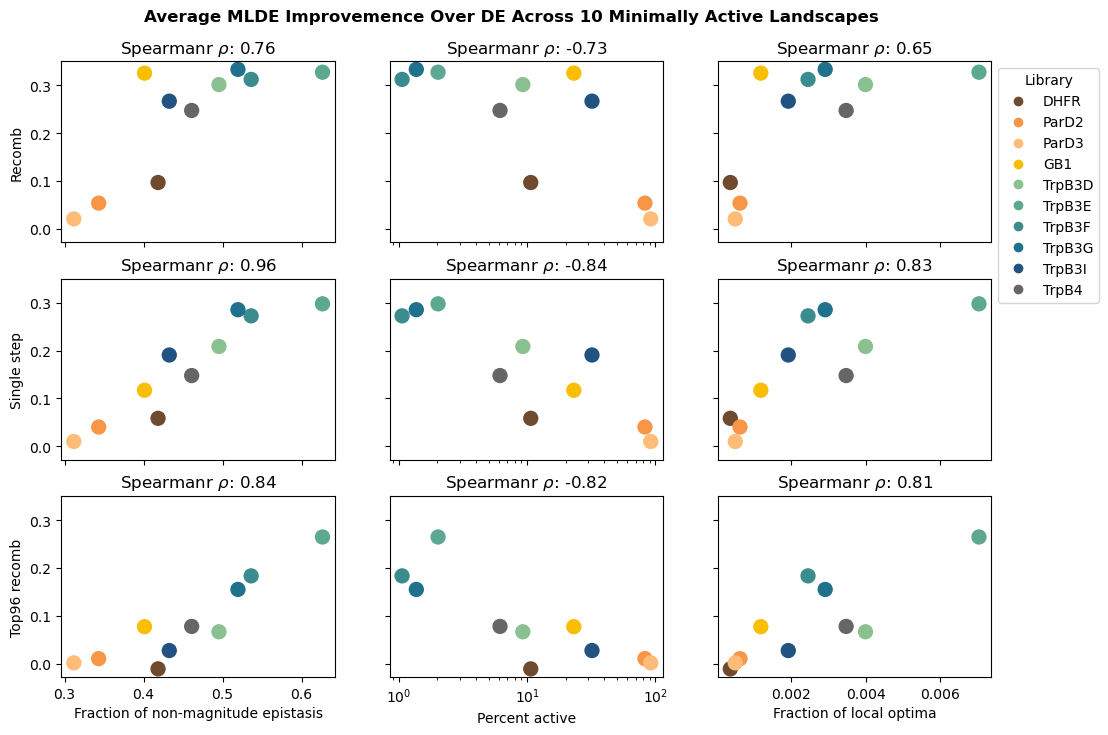

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(12, 8), sharex='col', sharey=True)

c = list(ACTLIB_COLORS.values())
# factors = {"fraction_non-magnitude": , "percent_active": "Percent active", "frac_loc_opt_total": "Fraction of local optima"}

for i, de in enumerate(DE_TYPES):

    y = merge_df["top_maxes"] - merge_df[f"{de}_mean_all"]

    # Scatter plot on the first axes
    # ax[0].errorbar(merge_df["fraction_non-magnitude"], y, yerr=de_std, fmt='o', c="gray", markersize=2)
    ax[i, 0].scatter(
        merge_df["fraction_non-magnitude"],
        y,
        c=c,
        s=100,
    )
    
    ax[i, 0].set_ylabel(DE_LEGEND_MAP[de])
    ax[i, 0].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["fraction_non-magnitude"])[0]))

    # Scatter plot on the second axes
    ax[i, 1].scatter(
        merge_df["percent_active"], y, c=c, s=100
    )
    ax[i, 1].set_xscale("log")
    # ax[1].set_xlabel('fraction_non_magnitude')

    # ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
    ax[i, 1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))

    # Scatter plot on the third axes
    ax[i, 2].scatter(
        merge_df["frac_loc_opt_total"],
        y,
        c=c,
        s=100,
    )

    ax[i, 2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))

    legend_list = []  # To store legend handles
    for l, lc in ACTLIB_COLORS.items():
        legend_list.append(
            Line2D(
                [0],
                [0],
                marker="o",
                linestyle="none",
                color=lc,
                label=l,
            )
        )
ax[0, 2].legend(handles=legend_list, loc="upper left", bbox_to_anchor=(1, 1), title="Library")
# ax[2].set_xlabel('MLDE and DE max fitness achieved')

ax[2, 0].set_xlabel("Fraction of non-magnitude epistasis")
ax[2, 1].set_xlabel("Percent active")
ax[2, 2].set_xlabel("Fraction of local optima")

fig.suptitle(
    "Average MLDE Improvemence Over DE Across 10 Minimally Active Landscapes",
    fontsize=12,
    fontweight="bold",
    y=0.945,
)
# Show plot
# plt.tight_layout()
plt.show()

In [30]:
[c for c in merge_df.columns if "top_maxes" in c]

['top_maxes',
 'top_maxes_Triad-esm',
 'top_maxes_Triad-ev',
 'top_maxes_Triad',
 'top_maxes_esm',
 'top_maxes_esmif',
 'top_maxes_ev',
 'top_maxes_msa-comb',
 'top_maxes_msanoif-comb',
 'top_maxes_struc-comb',
 'top_maxes_structnmsa-comb',
 'top_maxes_double',
 'top_maxes_single']

In [28]:
# merge_df = merge_df.set_index("lib")
best_ft = merge_df[
    [
        "top_maxes_Triad",
        "top_maxes_esm",
        "top_maxes_esmif",
        "top_maxes_ev",
        "top_maxes_double",
    ]
].max(axis=1)
best_ft

0    0.988670
1    0.999971
2    0.993628
3    0.808891
4    0.982877
5    1.000000
6    0.999839
7    0.987428
8    0.998316
9    0.839768
dtype: float64

In [32]:
# fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex="col" ,sharey=True)

# y1 = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]
# y2 = best_ft -  merge_df["single_step_DE_mean_all"]
# c = list(ACTLIB_COLORS.values())
# # factors = {"fraction_non-magnitude": , "percent_active": "Percent active", "frac_loc_opt_total": "Fraction of local optima"}

# # Scatter plot on the first axes
# # ax[0].errorbar(merge_df["fraction_non-magnitude"], y, yerr=de_std, fmt='o', c="gray", markersize=2)
# for i, (y, y_lable) in enumerate(zip([y1, y2], ["MLDE over DE", "Best ftMLDE over DE"])):
#     ax[i, 0].scatter(
#         merge_df["fraction_non-magnitude"],
#         y,
#         c=c,
#         s=100,
#     )

#     ax[i, 0].set_ylabel(y_lable)
#     ax[i, 0].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["fraction_non-magnitude"])[0]))

#     # Scatter plot on the second axes
#     ax[i, 1].scatter(
#         merge_df["percent_active"], y, c=c, s=100
#     )
#     ax[i, 1].set_xscale("log")
#     # ax[1].set_xlabel('fraction_non_magnitude')
#     # ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
#     ax[i, 1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))

#     # Scatter plot on the third axes
#     ax[i, 2].scatter(
#         merge_df["frac_loc_opt_total"],
#         y,
#         c=c,
#         s=100,
#     )

#     ax[i, 2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))

# legend_list = []  # To store legend handles
# for l, lc in ACTLIB_COLORS.items():
#     legend_list.append(
#         Line2D(
#             [0],
#             [0],
#             marker="o",
#             linestyle="none",
#             color=lc,
#             label=l,
#         )
#     )
# ax[0, 2].legend(handles=legend_list, loc="upper left", bbox_to_anchor=(1, 1), title="Library")
# ax[1, 0].set_xlabel("Fraction of non-magnitude epistasis")
# ax[1, 1].set_xlabel("Percent active")
# ax[1, 2].set_xlabel("Fraction of local optima")
#     # ax[2].set_xlabel('MLDE and DE max fitness achieved')

# fig.suptitle(
#     "(ft)MLDE Improvemence Over DE Across 10 Minimally Active Landscapes",
#     fontsize=12,
#     fontweight="bold",
#     y=0.975,
# )
# # Show plot
# plt.tight_layout()
# plt.show()

In [33]:
# fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# y = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]
# y2 = best_ft - merge_df["single_step_DE_mean_all"]
# c = list(ACTLIB_COLORS.values())
# # factors = {"fraction_non-magnitude": , "percent_active": "Percent active", "frac_loc_opt_total": "Fraction of local optima"}

# # Scatter plot on the first axes
# # ax[0].errorbar(merge_df["fraction_non-magnitude"], y, yerr=de_std, fmt='o', c="gray", markersize=2)
# ax[0].scatter(
#     merge_df["fraction_non-magnitude"], y, c=c, s=100, alpha=0.8, linewidth=1.2
# )
# ax[0].scatter(
#     merge_df["fraction_non-magnitude"],
#     y2,
#     edgecolors=c,
#     facecolors="none",
#     s=100,
#     marker="X",
#     linewidth=1.2,
# )
# ax[0].set_xlabel("Fraction of non-magnitude epistasis")
# ax[0].set_ylabel("Max fitness improvement")
# ax[0].set_title(
#     r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
#         spearmanr(y, merge_df["fraction_non-magnitude"])[0],
#         spearmanr(y2, merge_df["fraction_non-magnitude"])[0],
#     )
# )

# # Scatter plot on the second axes
# ax[1].scatter(merge_df["percent_active"], y, c=c, s=100, alpha=0.8, linewidth=1.2)
# ax[1].scatter(
#     merge_df["percent_active"],
#     y2,
#     edgecolors=c,
#     facecolors="none",
#     s=100,
#     marker="X",
#     linewidth=1.2,
# )
# ax[1].set_xscale("log")
# # ax[1].set_xlabel('fraction_non_magnitude')
# ax[1].set_xlabel("Percent active")
# # ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
# # ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))
# ax[1].set_title(
#     r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
#         spearmanr(y, merge_df["percent_active"])[0],
#         spearmanr(y2, merge_df["percent_active"])[0],
#     )
# )

# # Scatter plot on the third axes
# ax[2].scatter(merge_df["frac_loc_opt_total"], y, c=c, s=100, alpha=0.8, linewidth=1.2)
# ax[2].scatter(
#     merge_df["frac_loc_opt_total"],
#     y2,
#     edgecolors=c,
#     facecolors="none",
#     s=100,
#     linewidth=1.2,
#     marker="X",
# )
# ax[2].set_xlabel("Fraction of local optima")
# # ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))
# ax[2].set_title(
#     r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
#         spearmanr(y, merge_df["frac_loc_opt_total"])[0],
#         spearmanr(y2, merge_df["frac_loc_opt_total"])[0],
#     )
# )

# legend_list = []  # To store legend handles

# for l, lc in ACTLIB_COLORS.items():
#     legend_list.append(
#         Line2D([0], [0], marker="o", linestyle="none", color=lc, label=l, alpha=0.8)
#     )

# for marker, label in zip(["o", "X"], ["MLDE", "ftMLDE"]):
#     legend_list.append(
#         Line2D(
#             [0],
#             [0],
#             marker=marker,
#             linestyle="none",
#             color="black",
#             alpha=0.8,
#             label=f"{label} over DE",
#         )
#     )

# ax[2].legend(handles=legend_list, loc="upper left", bbox_to_anchor=(1, 1))
# # ax[2].set_xlabel('MLDE and DE max fitness achieved')
# fig.suptitle(
#     "(ft)MLDE Improvemence Over DE Across 10 Minimally Active Landscapes",
#     fontsize=12,
#     fontweight="bold",
#     y=0.95,
# )
# # Show plot
# plt.tight_layout()
# plt.show()

In [41]:
corr_df.descriptor

0                             n_site
1                      numb_measured
2                   percent_measured
3                        numb_active
4                     percent_active
                   ...              
118             single_msa-comb_ndcg
119           single_msa-comb_rocauc
120       single_structnmsa-comb_rho
121      single_structnmsa-comb_ndcg
122    single_structnmsa-comb_rocauc
Name: descriptor, Length: 123, dtype: object

In [48]:
corr_df[corr_df["descriptor"]=="fraction_non-magnitude"]["single_step_DE_mean_all"].values[0]

-0.6606060606060605

Text(0.5, 1.0, '$\\rho_{sub} = \\frac{\\alpha_{i}}{\\beta^{2}_{i+1}}$ for $i = 1, 2, 3$')

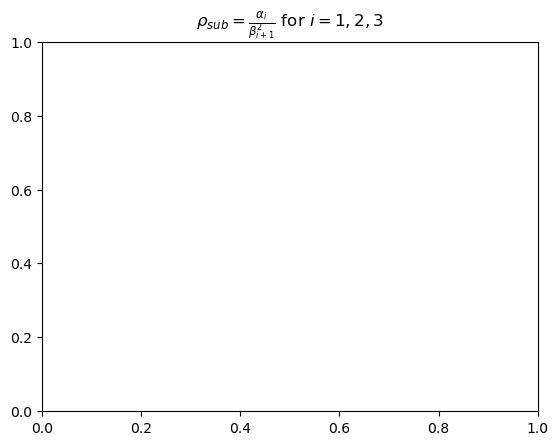

In [49]:
plt.title(r'$\rho_{sub} = \frac{\alpha_{i}}{\beta^{2}_{i+1}}$ for $i = 1, 2, 3$')


In [56]:
merge_df["single_step_DE_mean_all"]

0    0.889922
1    0.959795
2    0.979911
3    0.571523
4    0.740853
5    0.279738
6    0.693419
7    0.634426
8    0.792334
9    0.630497
Name: single_step_DE_mean_all, dtype: float64

In [60]:
best_ft.to_list()

[0.9886700676478656,
 0.9999709055389844,
 0.9936276886274132,
 0.8088907035641395,
 0.9828769186956248,
 1.0,
 0.9998386493281088,
 0.987427993672964,
 0.9983158325688412,
 0.8397679555867761]

In [25]:
merge_df = pd.read_csv("results/corr_all/384/boosting|ridge-top96/actcut-1/merge_all.csv")


In [26]:
merge_df[["lib", "top_maxes", "single_step_DE_mean_all"]]

,lib,top_maxes,single_step_DE_mean_all
0,DHFR,0.948174,0.889922
1,ParD2,0.999854,0.959795
2,ParD3,0.989675,0.979911
3,GB1,0.688501,0.571523
4,TrpB3D,0.949475,0.740853
5,TrpB3E,0.577537,0.279738
6,TrpB3F,0.966061,0.693419
7,TrpB3G,0.919919,0.634426
8,TrpB3I,0.983074,0.792334
9,TrpB4,0.778225,0.630497


In [34]:
merge_df[merge_df["lib"] == "TrpB3E"][["lib", "top_maxes", "single_step_DE_mean_all"]]

,lib,top_maxes,single_step_DE_mean_all
5,TrpB3E,0.577537,0.279738


In [36]:
(0.577537- 0.279738) /0.279738, (1- 0.279738) / 0.279738

(1.0645639848715585, 2.5747735380963617)

In [29]:
best_ft

0    0.988670
1    0.999971
2    0.993628
3    0.808891
4    0.982877
5    1.000000
6    0.999839
7    0.987428
8    0.998316
9    0.839768
dtype: float64

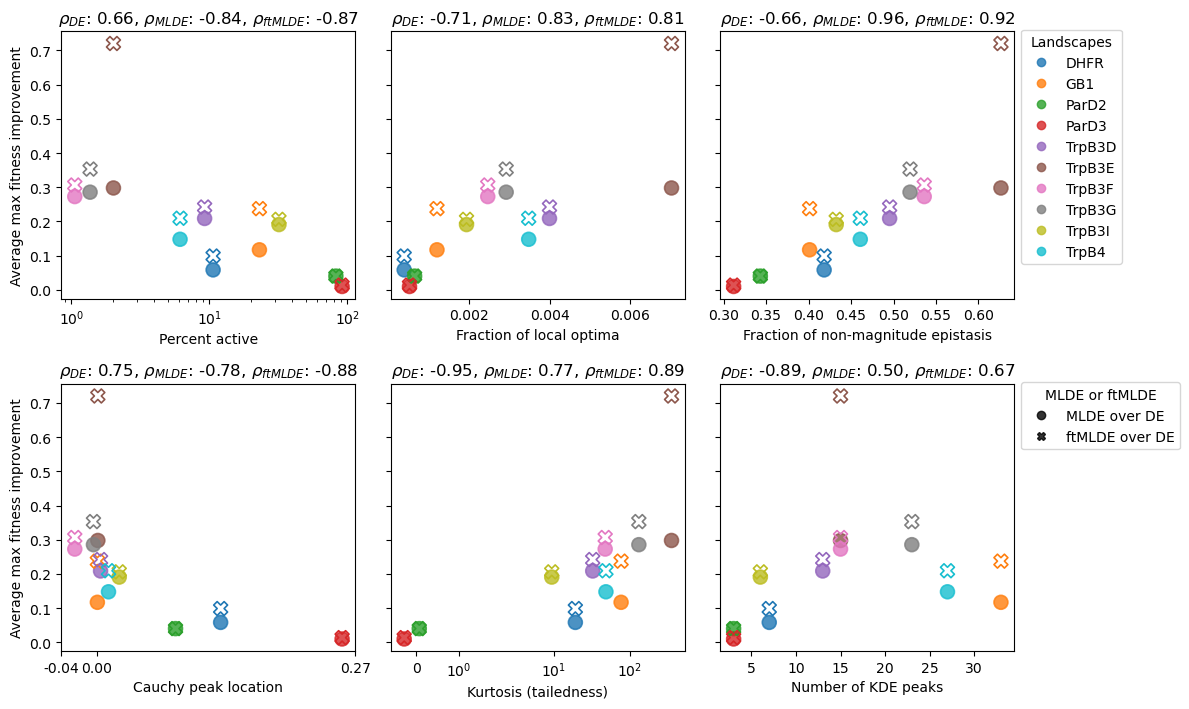

In [29]:
# Set x-axis tick label format with 4 decimal places
from matplotlib.ticker import FormatStrFormatter

merge_df = pd.read_csv("results/corr_all/384/boosting|ridge-top96/actcut-1/merge_all.csv")
merge_df = merge_df.sort_values("lib")

# merge_df = merge_df.set_index("lib")
best_ft = merge_df[
    [
        "top_maxes_Triad",
        "top_maxes_esm",
        "top_maxes_esmif",
        "top_maxes_ev",
        "top_maxes_double",
    ]
].max(axis=1)

fig, ax = plt.subplots(2, 3, figsize=(12, 7.2), sharey=True)

y = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]
y2 = best_ft.to_list() - merge_df["single_step_DE_mean_all"]
clist = sns.color_palette("tab10").as_hex()
# factors = {"fraction_non-magnitude": , "percent_active": "Percent active", "frac_loc_opt_total": "Fraction of local optima"}

# Scatter plot on the first axes
# ax[0].errorbar(merge_df["fraction_non-magnitude"], y, yerr=de_std, fmt='o', c="gray", markersize=2)


# Scatter plot on the second axes
ax[0, 0].scatter(merge_df["percent_active"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[0, 0].scatter(
    merge_df["percent_active"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[0, 0].set_xscale("log")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[0, 0].set_xlabel("Percent active")

ax[0, 0].set_ylabel("Average max fitness improvement")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
# ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))
ax[0, 0].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="percent_active"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["percent_active"])[0],
        spearmanr(y2, merge_df["percent_active"])[0],
    )
)

# Scatter plot on the third axes
ax[0, 1].scatter(merge_df["frac_loc_opt_total"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[0, 1].scatter(
    merge_df["frac_loc_opt_total"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    linewidth=1.2,
    marker="X",
)
ax[0, 1].set_xlabel("Fraction of local optima")
# ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))
ax[0, 1].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="frac_loc_opt_total"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["frac_loc_opt_total"])[0],
        spearmanr(y2, merge_df["frac_loc_opt_total"])[0],
    )
)

ax[0, 2].scatter(
    merge_df["fraction_non-magnitude"], y, c=clist, s=100, alpha=0.8, linewidth=1.2
)
ax[0, 2].scatter(
    merge_df["fraction_non-magnitude"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[0, 2].set_xlabel("Fraction of non-magnitude epistasis")
ax[0, 2].set_title(
    # de rho corr_df[corr_df["descriptor"]=="fraction_non-magnitude"]["single_step_DE_mean_all"].values[0]
    # r'$\rho_{sub} = \frac{\alpha_{i}}{\beta^{2}_{i+1}}$ for $i = 1, 2, 3$'
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="fraction_non-magnitude"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["fraction_non-magnitude"])[0],
        spearmanr(y2, merge_df["fraction_non-magnitude"])[0],
    )
)


# Scatter plot on the second axes
ax[1, 0].scatter(merge_df["loc"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[1, 0].scatter(
    merge_df["loc"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[1, 0].set_xscale("symlog")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[1, 0].set_xlabel("Cauchy peak location")
ax[1, 0].set_ylabel("Average max fitness improvement")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
# ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))
ax[1, 0].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="loc"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["loc"])[0],
        spearmanr(y2, merge_df["loc"])[0],
    )
)
ax[1, 0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


ax[1, 1].scatter(
    merge_df["kurt"], y, c=clist, s=100, alpha=0.8, linewidth=1.2
)
ax[1, 1].scatter(
    merge_df["kurt"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[1, 1].set_xlabel("Kurtosis (tailedness)")
ax[1, 1].set_xscale("symlog")
ax[1, 1].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="kurt"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["kurt"])[0],
        spearmanr(y2, merge_df["kurt"])[0],
    )
)

# Scatter plot on the third axes
ax[1, 2].scatter(merge_df["numb_kde_peak"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[1, 2].scatter(
    merge_df["numb_kde_peak"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    linewidth=1.2,
    marker="X",
)
ax[1, 2].set_xlabel("Number of KDE peaks")
# ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))
ax[1, 2].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="numb_kde_peak"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["numb_kde_peak"])[0],
        spearmanr(y2, merge_df["numb_kde_peak"])[0],
    )
)

legend_list = []  # To store legend handles
legend_list2 = []

for l, lc in zip(merge_df["lib"], clist):
    legend_list.append(
        Line2D([0], [0], marker="o", linestyle="none", color=lc, label=l, alpha=0.8)
    )
ax[0, 2].legend(handles=legend_list, loc="upper left",title="Landscapes",bbox_to_anchor=(1, 1.0325))

for marker, label in zip(["o", "X"], ["MLDE", "ftMLDE"]):
    legend_list2.append(
        Line2D(
            [0],
            [0],
            marker=marker,
            linestyle="none",
            color="black",
            alpha=0.8,
            label=f"{label} over DE",
        )
    )
ax[1, 2].legend(handles=legend_list2, loc="upper left",title="MLDE or ftMLDE",bbox_to_anchor=(1, 1.0315))


# ax[2].set_xlabel('MLDE and DE max fitness achieved')
# fig.suptitle(
#     "(ft)MLDE Improvemence Over DE Across 10 Minimally Active Landscapes",
#     fontsize=12,
#     fontweight="bold",
#     y=0.975,
# )
# Show plot
plt.tight_layout()
plt.show()

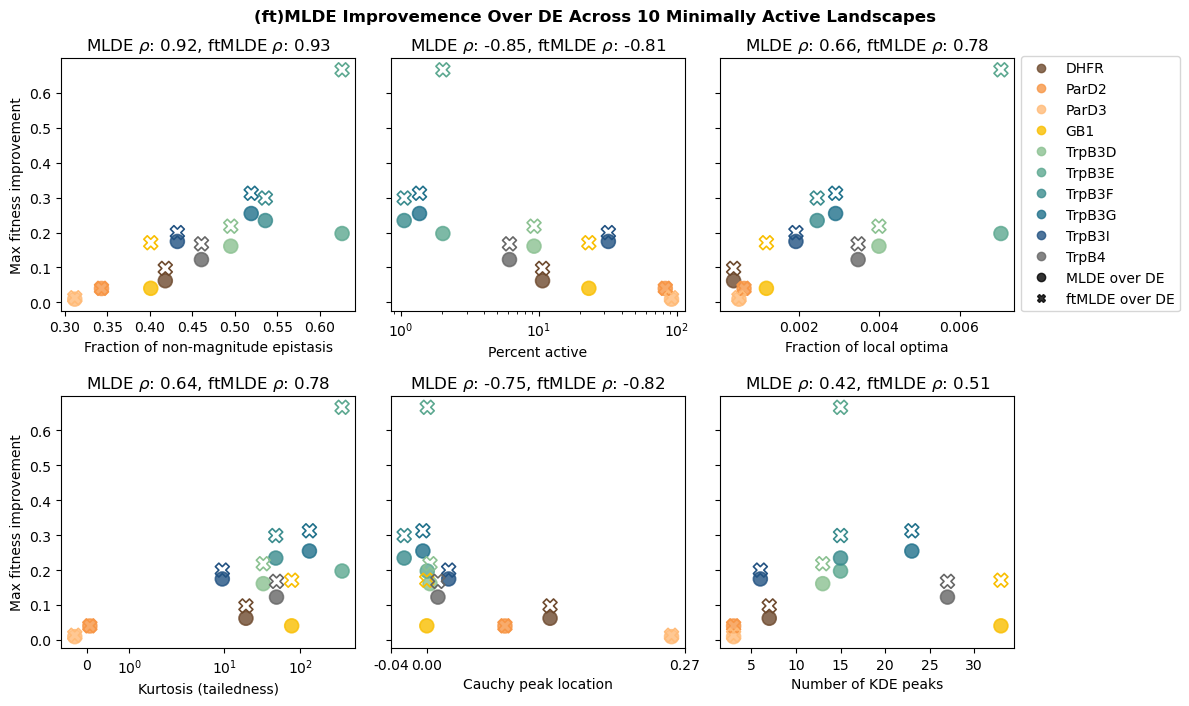

In [67]:
# Set x-axis tick label format with 4 decimal places
from matplotlib.ticker import FormatStrFormatter

merge_df = pd.read_csv("results/corr_all/192/boosting|ridge-top96/actcut-1/merge_all.csv")

fig, ax = plt.subplots(2, 3, figsize=(12, 7.2), sharey=True)

y = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]

# merge_df = merge_df.set_index("lib")
best_ft = merge_df[
    [
        "top_maxes_Triad",
        "top_maxes_esm",
        "top_maxes_esmif",
        "top_maxes_ev",
        "top_maxes_double",
    ]
].max(axis=1)

y2 = best_ft - merge_df["single_step_DE_mean_all"]
c = list(ACTLIB_COLORS.values())
# factors = {"fraction_non-magnitude": , "percent_active": "Percent active", "frac_loc_opt_total": "Fraction of local optima"}

# Scatter plot on the first axes
# ax[0].errorbar(merge_df["fraction_non-magnitude"], y, yerr=de_std, fmt='o', c="gray", markersize=2)
ax[0, 0].scatter(
    merge_df["fraction_non-magnitude"], y, c=c, s=100, alpha=0.8, linewidth=1.2
)
ax[0, 0].scatter(
    merge_df["fraction_non-magnitude"],
    y2,
    edgecolors=c,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[0, 0].set_xlabel("Fraction of non-magnitude epistasis")
ax[0, 0].set_ylabel("Max fitness improvement")
ax[0, 0].set_title(
    r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
        spearmanr(y, merge_df["fraction_non-magnitude"])[0],
        spearmanr(y2, merge_df["fraction_non-magnitude"])[0],
    )
)

# Scatter plot on the second axes
ax[0, 1].scatter(merge_df["percent_active"], y, c=c, s=100, alpha=0.8, linewidth=1.2)
ax[0, 1].scatter(
    merge_df["percent_active"],
    y2,
    edgecolors=c,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[0, 1].set_xscale("log")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[0, 1].set_xlabel("Percent active")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
# ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))
ax[0, 1].set_title(
    r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
        spearmanr(y, merge_df["percent_active"])[0],
        spearmanr(y2, merge_df["percent_active"])[0],
    )
)

# Scatter plot on the third axes
ax[0, 2].scatter(merge_df["frac_loc_opt_total"], y, c=c, s=100, alpha=0.8, linewidth=1.2)
ax[0, 2].scatter(
    merge_df["frac_loc_opt_total"],
    y2,
    edgecolors=c,
    facecolors="none",
    s=100,
    linewidth=1.2,
    marker="X",
)
ax[0, 2].set_xlabel("Fraction of local optima")
# ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))
ax[0, 2].set_title(
    r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
        spearmanr(y, merge_df["frac_loc_opt_total"])[0],
        spearmanr(y2, merge_df["frac_loc_opt_total"])[0],
    )
)


ax[1, 0].scatter(
    merge_df["kurt"], y, c=c, s=100, alpha=0.8, linewidth=1.2
)
ax[1, 0].scatter(
    merge_df["kurt"],
    y2,
    edgecolors=c,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[1, 0].set_xlabel("Kurtosis (tailedness)")
ax[1, 0].set_xscale("symlog")
ax[1, 0].set_ylabel("Max fitness improvement")
ax[1, 0].set_title(
    r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
        spearmanr(y, merge_df["kurt"])[0],
        spearmanr(y2, merge_df["kurt"])[0],
    )
)

# Scatter plot on the second axes
ax[1, 1].scatter(merge_df["loc"], y, c=c, s=100, alpha=0.8, linewidth=1.2)
ax[1, 1].scatter(
    merge_df["loc"],
    y2,
    edgecolors=c,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[1, 1].set_xscale("symlog")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[1, 1].set_xlabel("Cauchy peak location")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
# ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))
ax[1, 1].set_title(
    r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
        spearmanr(y, merge_df["loc"])[0],
        spearmanr(y2, merge_df["loc"])[0],
    )
)
ax[1, 1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Scatter plot on the third axes
ax[1, 2].scatter(merge_df["numb_kde_peak"], y, c=c, s=100, alpha=0.8, linewidth=1.2)
ax[1, 2].scatter(
    merge_df["numb_kde_peak"],
    y2,
    edgecolors=c,
    facecolors="none",
    s=100,
    linewidth=1.2,
    marker="X",
)
ax[1, 2].set_xlabel("Number of KDE peaks")
# ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))
ax[1, 2].set_title(
    r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
        spearmanr(y, merge_df["numb_kde_peak"])[0],
        spearmanr(y2, merge_df["numb_kde_peak"])[0],
    )
)

legend_list = []  # To store legend handles

for l, lc in ACTLIB_COLORS.items():
    legend_list.append(
        Line2D([0], [0], marker="o", linestyle="none", color=lc, label=l, alpha=0.8)
    )

for marker, label in zip(["o", "X"], ["MLDE", "ftMLDE"]):
    legend_list.append(
        Line2D(
            [0],
            [0],
            marker=marker,
            linestyle="none",
            color="black",
            alpha=0.8,
            label=f"{label} over DE",
        )
    )

ax[0, 2].legend(handles=legend_list, loc="upper left", bbox_to_anchor=(1, 1.0375))
# ax[2].set_xlabel('MLDE and DE max fitness achieved')
fig.suptitle(
    "(ft)MLDE Improvemence Over DE Across 10 Minimally Active Landscapes",
    fontsize=12,
    fontweight="bold",
    y=0.975,
)
# Show plot
plt.tight_layout()
plt.show()